<a href="https://colab.research.google.com/github/PriyaMurali16/PriyaMurali16/blob/main/KaggleAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.options.display.max_columns = 999

In [ ]:
data = pd.read_csv("train_luc.csv")

In [ ]:
data.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [ ]:
data["year"] = pd.DatetimeIndex(data['datetime']).year
data["month"] = pd.DatetimeIndex(data['datetime']).month
data["dayofweek"] = pd.DatetimeIndex(data['datetime']).dayofweek
data["hour"] = pd.DatetimeIndex(data['datetime']).hour

data.drop(labels = "datetime", axis =1, inplace = True)

In [ ]:
data.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,dayofweek,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9174 entries, 0 to 9173
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      9174 non-null   int64  
 1   holiday     9174 non-null   int64  
 2   workingday  9174 non-null   int64  
 3   weather     9174 non-null   int64  
 4   temp        9174 non-null   float64
 5   atemp       9174 non-null   float64
 6   humidity    9174 non-null   int64  
 7   windspeed   9174 non-null   float64
 8   casual      9174 non-null   int64  
 9   registered  9174 non-null   int64  
 10  count       9174 non-null   int64  
 11  year        9174 non-null   int64  
 12  month       9174 non-null   int64  
 13  dayofweek   9174 non-null   int64  
 14  hour        9174 non-null   int64  
dtypes: float64(3), int64(12)
memory usage: 1.1 MB


In [ ]:
data.shape

(9174, 12)

In [ ]:
#season, holiday, workingday, weather, year, month, dayofweek, and hour should be categorical variables.
#so converting them into categorical datatype.

categorical = ['season', 'holiday', 'workingday', 'weather','year','month', 'dayofweek', 'hour']

for i in categorical:
    data[i] = data[i].astype("category")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9174 entries, 0 to 9173
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      9174 non-null   category
 1   holiday     9174 non-null   category
 2   workingday  9174 non-null   category
 3   weather     9174 non-null   category
 4   temp        9174 non-null   float64 
 5   atemp       9174 non-null   float64 
 6   humidity    9174 non-null   int64   
 7   windspeed   9174 non-null   float64 
 8   casual      9174 non-null   int64   
 9   registered  9174 non-null   int64   
 10  count       9174 non-null   int64   
 11  year        9174 non-null   category
 12  month       9174 non-null   category
 13  dayofweek   9174 non-null   category
 14  hour        9174 non-null   category
dtypes: category(8), float64(3), int64(4)
memory usage: 575.7 KB


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


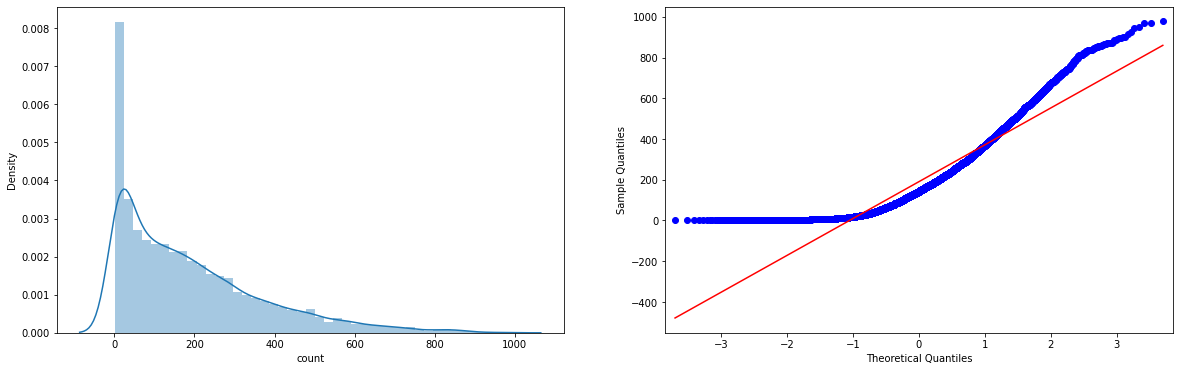

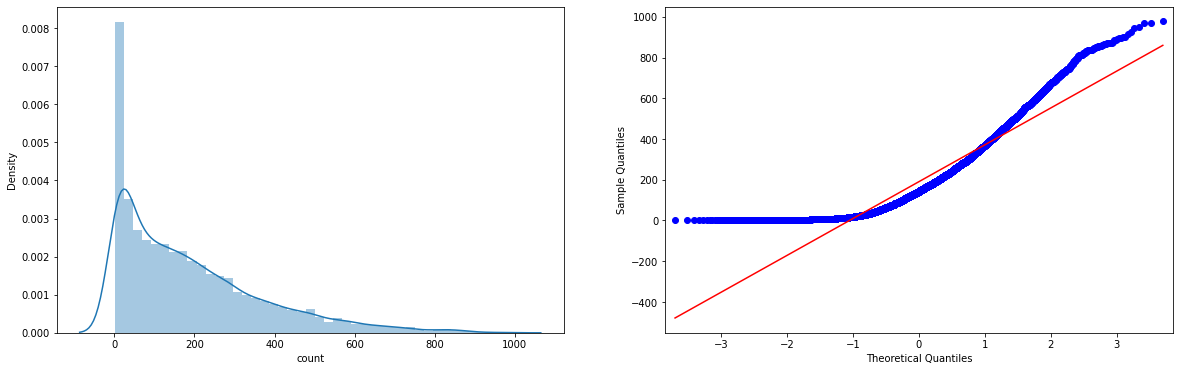

In [ ]:
#checking the distribution of the targetvariable.
import statsmodels.api as sm
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(data["count"], ax=ax1)
sm.qqplot(data["count"],ax = ax2, line = 's')

In [ ]:
#log transforming our target variable.

data["count"] = np.log(data["count"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


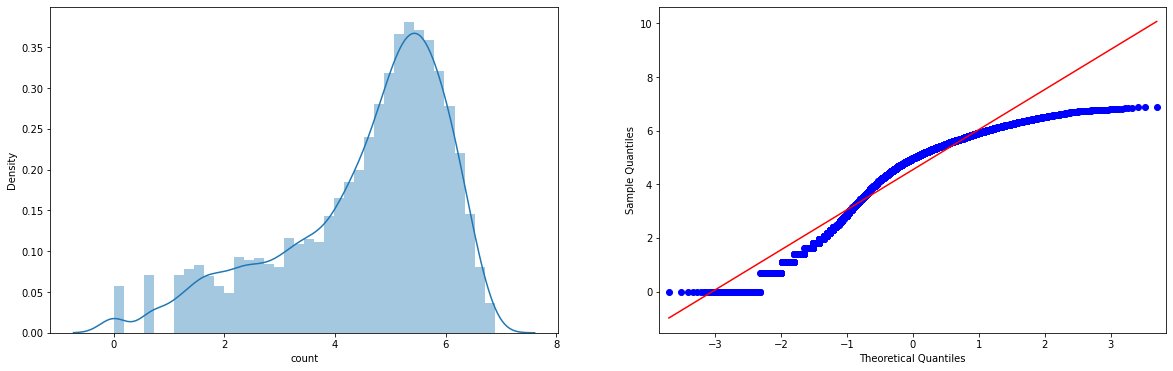

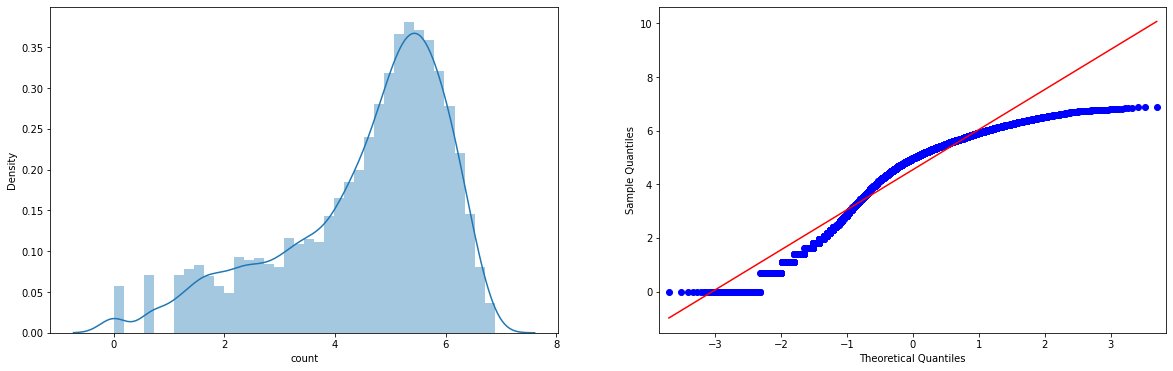

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(data["count"], ax=ax1)
sm.qqplot(data["count"],ax = ax2, line = 's')

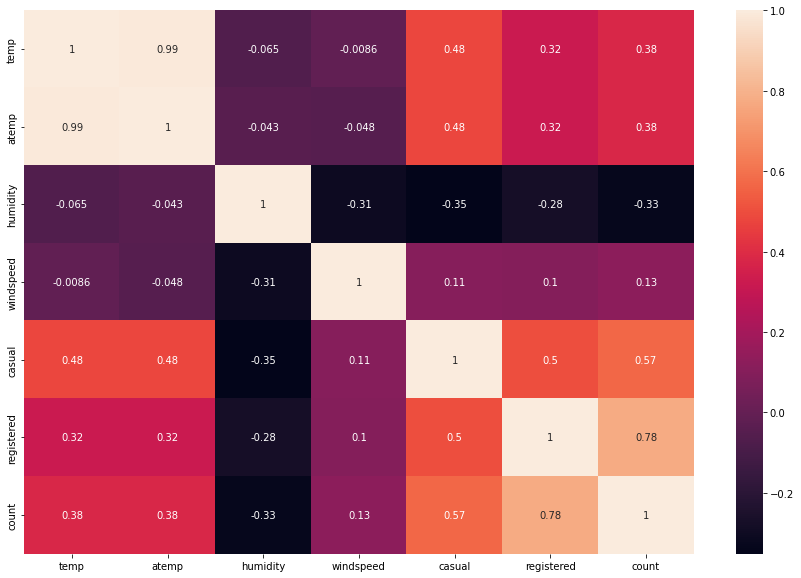

In [ ]:
#correlation analysis

plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), annot = True)

In [ ]:
#atemp is higherly correlated with temp variable.

#registered and casual are also related to count

#Therefore removing atemp, registered and casual attributes.

data.drop(labels = ["atemp", "casual", "registered"], axis = 1, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9174 entries, 0 to 9173
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      9174 non-null   category
 1   holiday     9174 non-null   category
 2   workingday  9174 non-null   category
 3   weather     9174 non-null   category
 4   temp        9174 non-null   float64 
 5   humidity    9174 non-null   int64   
 6   windspeed   9174 non-null   float64 
 7   count       9174 non-null   float64 
 8   year        9174 non-null   category
 9   month       9174 non-null   category
 10  dayofweek   9174 non-null   category
 11  hour        9174 non-null   category
dtypes: category(8), float64(3), int64(1)
memory usage: 360.7 KB


In [ ]:
data.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'windspeed', 'count', 'year', 'month', 'dayofweek', 'hour'],
      dtype='object')

In [ ]:
#one hot encoding

data1 = pd.get_dummies(data,columns=['season','holiday', 'workingday', 'weather','year', 'month', 'dayofweek', 'hour'],drop_first=True)

In [ ]:
data1.head()

,temp,humidity,windspeed,count,season_2,season_3,season_4,holiday_1,workingday_1,weather_2,weather_3,weather_4,year_2012,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,9.84,81,0.0,2.772589,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9.02,80,0.0,3.688879,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9.02,80,0.0,3.465736,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9.84,75,0.0,2.564949,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9.84,75,0.0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#splitting our dataset

x = data1[['temp', 'humidity', 'windspeed','season_2', 'season_3',
       'season_4', 'holiday_1', 'workingday_1', 'weather_2', 'weather_3',
       'weather_4', 'year_2012', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'dayofweek_1', 'dayofweek_2', 'dayofweek_3', 'dayofweek_4',
       'dayofweek_5', 'dayofweek_6', 'hour_1', 'hour_2', 'hour_3', 'hour_4',
       'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17',
       'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23']]

y = data1["count"]

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=101)

In [ ]:
#linear regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

predictions = lm.predict(x_test)

from sklearn.metrics import mean_squared_error
print("RMSE of the linear regression model :" +str(np.sqrt(mean_squared_error(predictions,y_test))))

RMSE of the linear regression model :0.6277154947368208


In [ ]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

predict = rf.predict(x_test)

print("RMSE of the Randomforest Model:" +str(np.sqrt(mean_squared_error(predict,y_test))))

RMSE of the Randomforest Model:0.4958803044216403


In [ ]:
trial=pd.read_csv("train_luc.csv")

In [ ]:
trial.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.053782,-0.026057,0.005661,0.289411,0.300836,0.198118,-0.148175,0.128765,0.171627,0.178485
holiday,0.053782,1.000000,-0.261289,-0.024705,0.027247,0.021613,0.010063,0.010490,0.060569,-0.011170,0.007303
workingday,-0.026057,-0.261289,1.000000,0.025796,0.008080,0.004248,-0.042038,0.020902,-0.318646,0.116545,0.009777
weather,0.005661,-0.024705,0.025796,1.000000,-0.056071,-0.054807,0.408866,0.016127,-0.133502,-0.112213,-0.130228
temp,0.289411,0.027247,0.008080,-0.056071,1.000000,0.992399,-0.064663,-0.008570,0.479073,0.323455,0.401246
atemp,0.300836,0.021613,0.004248,-0.054807,0.992399,1.000000,-0.043438,-0.048005,0.478243,0.322273,0.400032
humidity,0.198118,0.010063,-0.042038,0.408866,-0.064663,-0.043438,1.000000,-0.307589,-0.351558,-0.275160,-0.325974
windspeed,-0.148175,0.010490,0.020902,0.016127,-0.008570,-0.048005,-0.307589,1.000000,0.106504,0.100555,0.113096
casual,0.128765,0.060569,-0.318646,-0.133502,0.479073,0.478243,-0.351558,0.106504,1.000000,0.500273,0.691666
registered,0.171627,-0.011170,0.116545,-0.112213,0.323455,0.322273,-0.275160,0.100555,0.500273,1.000000,0.971367


In [ ]:
trial.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
trial.columns


Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
trial_sep=trial[['season','temp','atemp','windspeed','count']]

In [ ]:
trial_sep.corr()

,season,temp,atemp,windspeed,count
season,1.000000,0.289411,0.300836,-0.148175,0.178485
temp,0.289411,1.000000,0.992399,-0.008570,0.401246
atemp,0.300836,0.992399,1.000000,-0.048005,0.400032
windspeed,-0.148175,-0.008570,-0.048005,1.000000,0.113096
count,0.178485,0.401246,0.400032,0.113096,1.000000


In [ ]:
trial_sep.dtypes

season         int64
temp         float64
atemp        float64
windspeed    float64
count          int64
dtype: object

In [ ]:
trial_sep["count"] = np.log(trial_sep["count"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
from sklearn.model_selection import train_test_split
X=trial_sep.iloc[:,0:4]
Y=trial_sep.iloc[:,4]
test_size = 0.33

# Selection of records to inclue in which sub-dataset must be done randomly - use the for seed radomization

seed = 7

# Split the dataset (both input & output) into training/testing datasets

X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=seed)

In [ ]:
trial_sep.isnull().sum()

season       0
temp         0
atemp        0
windspeed    0
count        0
dtype: int64

In [ ]:

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)

predictions = lm.predict(X_test)

from sklearn.metrics import mean_squared_error
print("RMSE of the linear regression model :" +str(np.sqrt(mean_squared_error(predictions,Y_test))))

RMSE of the linear regression model :1.357732868473487


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
#Changing the number of folds

# Evaluate the algorithm
# Specify the K-size

num_folds = 10

# Fix the random seed must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated

seed = 7

# Split the whole data set into folds

kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)

# For Linear regression, we can use explained variance value to evaluate the model/algorithm

scoring = 'explained_variance'

# Train the model and run K-foLd cross-validation to validate/evaluate the model

results = cross_val_score(lm, x, y, cv=kfold, scoring=scoring)

# Print out the evaluation results
# Result: the average of all the results obtained from the k-fold cross validation

print("Average of all results from the K-fold Cross Validation, using exlpained variance:",results.mean())

Average of all results from the K-fold Cross Validation, using exlpained variance: -17439428010514.557
